# 22-23 Data Process General.py

In [5]:
#22-23 Data Process General.py
import pandas as pd

# 读取CSV文件
df = pd.read_csv("22-23 Premier League Data (Raw from BZY).csv")
df = df.dropna()

# 假设除了'PlayerRating'之外的所有列都是相同的每11行
# 我们将选择第一个条目（例如：start）作为代表
averages = []
other_columns_data = []

for start in range(0, len(df), 11):
    # 计算当前块的平均值
    avg = df['PlayerRating'][start:start+11].mean()
    averages.append(avg)

    # 取出其他列的数据（假设它们在每个块中都是相同的）
    other_columns = df.iloc[start].drop('PlayerRating')  # 删除PlayerRating列以避免重复
    other_columns_data.append(other_columns)

# 创建一个新的DataFrame用于存放平均值和其他列的数据
avg_df = pd.DataFrame(other_columns_data).reset_index(drop=True)
avg_df['Average Rating'] = averages  # 添加平均评分列

# 将新的DataFrame写入CSV文件
avg_df.to_csv('22-23 Premier League All Teams Rating.csv', index=False)

display(avg_df)

,Team,MatchDate,Average Rating
0,Southampton,1-Sep-22,75.636364
1,Tottenham Hotspur,1-Sep-22,82.090909
2,West Ham United,1-Sep-22,80.181818
3,Leicester City,1-Sep-22,79.454545
4,Wolverhampton Wanderers,1-Sep-22,78.545455
...,...,...,...
1075,Tottenham Hotspur,3-Aug-23,81.454545
1076,Aston Villa,11-Aug-23,79.000000
1077,Chelsea,11-Aug-23,81.636364
1078,Liverpool,11-Aug-23,84.272727


# 23-24 Data Process General.py

In [4]:
#23-24 Data Process General.py
import pandas as pd

# 读取CSV文件
df = pd.read_csv("23-24 Premier League Data (Raw from BZY).csv")
df = df.dropna()

# 将MatchDate列的格式从"Aug 11, 2023"转换为"2-3-2024"
df['MatchDate'] = pd.to_datetime(df['MatchDate']).dt.strftime('%-m-%-d-%Y')

# 假设除了'PlayerRating'之外的所有列都是相同的每11行
averages = []
other_columns_data = []

for start in range(0, len(df), 11):
    # 计算当前块的平均值
    avg = df['PlayerRating'][start:start+11].mean()
    averages.append(avg)

    # 取出其他列的数据（假设它们在每个块中都是相同的）
    other_columns = df.iloc[start].drop('PlayerRating')  # 删除PlayerRating列以避免重复
    other_columns_data.append(other_columns)

# 创建一个新的DataFrame用于存放平均值和其他列的数据
avg_df = pd.DataFrame(other_columns_data).reset_index(drop=True)
avg_df['Average Rating'] = averages  # 添加平均评分列

# 将新的DataFrame写入CSV文件，确保日期格式正确
avg_df.to_csv('23-24 Premier League All Teams Rating.csv', index=False, date_format='%m-%d-%Y')

display(avg_df)

,Team,MatchDate,Average Rating
0,Manchester City,8-11-2023,86.363636
1,Manchester City,1-17-2024,85.545455
2,Manchester City,9-22-2023,85.090909
3,Manchester City,9-22-2023,85.272727
4,Manchester City,9-26-2023,84.727273
...,...,...,...
995,Luton Town,8-20-2024,73.181818
996,Luton Town,5-8-2024,73.000000
997,Sheffield United,10-30-2023,73.636364
998,Wolverhampton Wanderers,10-16-2023,76.727273


# 24-25 Data Process General.py

In [3]:
#24-25 Data Process General.py
import pandas as pd

# 读取CSV文件
df = pd.read_csv("24-25 Premier League Data (Raw from BZY).csv")
df = df.dropna()

# 将MatchDate列的格式从"Aug 11, 2023"转换为"2-3-2024"
df['MatchDate'] = pd.to_datetime(df['MatchDate']).dt.strftime('%-m-%-d-%Y')

# 假设除了'PlayerRating'之外的所有列都是相同的每11行
averages = []
other_columns_data = []

for start in range(0, len(df), 11):
    # 计算当前块的平均值
    avg = df['PlayerRating'][start:start+11].mean()
    averages.append(avg)

    # 取出其他列的数据（假设它们在每个块中都是相同的）
    other_columns = df.iloc[start].drop('PlayerRating')  # 删除PlayerRating列以避免重复
    other_columns_data.append(other_columns)

# 创建一个新的DataFrame用于存放平均值和其他列的数据
avg_df = pd.DataFrame(other_columns_data).reset_index(drop=True)
avg_df['Average Rating'] = averages  # 添加平均评分列

# 将新的DataFrame写入CSV文件，确保日期格式正确
avg_df.to_csv('23-24 Premier League All Teams Rating.csv', index=False, date_format='%m-%d-%Y')

display(avg_df)

,Team,MatchDate,Average Rating
0,Ipswich Town,8-7-2024,73.181818
1,Ipswich Town,9-26-2024,74.636364
2,Ipswich Town,9-26-2024,74.636364
3,Ipswich Town,10-2-2024,73.909091
4,Ipswich Town,10-2-2024,74.727273
...,...,...,...
95,AFC Bournemouth,8-7-2024,76.909091
96,AFC Bournemouth,10-2-2024,77.000000
97,AFC Bournemouth,10-8-2024,77.000000
98,AFC Bournemouth,9-26-2024,77.000000


# 22-23 Premier League Data Matching.py

In [14]:
#22-23 Premier League Data Matching.py
import pandas as pd

# 读取CSV文件
df_A = pd.read_csv('22-23 Premier League All Teams Rating.csv')
df_B = pd.read_csv('22-23 Premier League Results.csv')

# 转换MatchDate列为datetime类型以便进行比较
df_A['MatchDate'] = pd.to_datetime(df_A['MatchDate'])
df_B['MatchDate'] = pd.to_datetime(df_B['MatchDate'])

# 函数：找到最接近的日期的平均评分
def find_nearest_rating(team, match_date):
    # 筛选特定队伍的数据
    team_data = df_A[df_A['Team'] == team]

    # 找到与目标日期最接近的日期记录
    nearest_row = team_data.iloc[(team_data['MatchDate'] - match_date).abs().argsort()[:1]]

    # 返回最接近日期的平均评分
    return nearest_row['Average Rating'].values[0] if not nearest_row.empty else None

# 新列初始化为空列表
home_ratings = []
away_ratings = []

# 遍历B中的每一行
for index, row in df_B.iterrows():
    # 获取主场队伍和客场队伍的名称及比赛日期
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_date = row['MatchDate']

    # 查找主场队伍的评分
    home_match = df_A[(df_A['Team'] == home_team) & (df_A['MatchDate'] == match_date)]
    if not home_match.empty:
        home_ratings.append(home_match['Average Rating'].iloc[0])
    else:
        home_ratings.append(find_nearest_rating(home_team, match_date))

    # 查找客场队伍的评分
    away_match = df_A[(df_A['Team'] == away_team) & (df_A['MatchDate'] == match_date)]
    if not away_match.empty:
        away_ratings.append(away_match['Average Rating'].iloc[0])
    else:
        away_ratings.append(find_nearest_rating(away_team, match_date))

# 将计算得到的评分添加到B的DataFrame中
df_B['HomeTeamRating'] = home_ratings
df_B['AwayTeamRating'] = away_ratings

# 函数：获取过去5场比赛的结果字符串
def get_last_5_results(team, current_date, df):
    # 过滤出特定队伍的比赛，并且日期小于当前比赛日期
    past_matches = df[((df['HomeTeam'] == team) | (df['AwayTeam'] == team)) & (df['MatchDate'] < current_date)]

    # 取最后5场比赛
    last_5 = past_matches.tail(5)

    # 计算W, L, D
    results = []
    for i, row in last_5.iterrows():
        if row['HomeTeam'] == team:  # 如果队伍是主队
            if row['HomeGoals'] > row['AwayGoals']:
                results.append('W')
            elif row['HomeGoals'] < row['AwayGoals']:
                results.append('L')
            else:
                results.append('D')
        else:  # 队伍是客队
            if row['AwayGoals'] > row['HomeGoals']:
                results.append('W')
            elif row['AwayGoals'] < row['HomeGoals']:
                results.append('L')
            else:
                results.append('D')

    return ''.join(results)

# 新列初始化为空列表
home_previous = []
away_previous = []

# 遍历B中的每一行
for index, row in df_B.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_date = row['MatchDate']

    # 获取主客队的过去5场比赛结果
    home_previous.append(get_last_5_results(home_team, match_date, df_B))
    away_previous.append(get_last_5_results(away_team, match_date, df_B))

# 将计算得到的过去5场比赛结果添加到B的DataFrame中
df_B['HomePrevious'] = home_previous
df_B['AwayPrevious'] = away_previous

# 添加 MatchResult 列，根据 HomeGoals 和 AwayGoals 计算结果
def calculate_match_result(row):
    if row['HomeGoals'] > row['AwayGoals']:
        return 1  # 主队胜
    elif row['HomeGoals'] < row['AwayGoals']:
        return 2  # 客队胜
    else:
        return 0  # 平局

df_B['MatchResult'] = df_B.apply(calculate_match_result, axis=1)

# 输出新的DataFrame到CSV
df_B.to_csv('22-23 Premier League Data Final.csv', index=False)
df_B = pd.read_csv('22-23 Premier League Data Final.csv').sort_values(by='MatchDate')
display(df_B)

,MatchDate,HomeTeam,HomeGoals,AwayTeam,AwayGoals,HomeTeamRating,AwayTeamRating,HomePrevious,AwayPrevious,MatchResult
379,2022-08-05,Crystal Palace,0,Arsenal,2,76.909091,79.727273,NaN,NaN,2
373,2022-08-06,Fulham,2,Liverpool,2,75.000000,84.727273,NaN,NaN,0
374,2022-08-06,AFC Bournemouth,2,Aston Villa,0,73.818182,80.454545,NaN,NaN,1
378,2022-08-06,Everton,0,Chelsea,1,77.363636,84.090909,NaN,NaN,2
376,2022-08-06,Newcastle United,2,Nottingham Forest,0,79.090909,74.454545,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
6,2023-05-28,Leeds United,1,Tottenham Hotspur,4,77.909091,82.272727,DLWDW,DWWDW,2
7,2023-05-28,Leicester City,2,West Ham United,1,77.727273,79.545455,LLLLD,DWLLL,1
9,2023-05-28,Southampton,4,Liverpool,4,74.636364,84.090909,WLWDL,WWLDD,0
5,2023-05-28,Everton,1,AFC Bournemouth,0,76.909091,74.000000,DDDLL,DLLLW,1


# 23-24 Premier League Data Matching.py

In [6]:
#23-24 Premier League Data Matching.py
import pandas as pd

# 读取CSV文件
df_A = pd.read_csv('23-24 Premier League All Teams Rating.csv')
df_B = pd.read_csv('23-24 Premier League Results.csv')

# 转换MatchDate列为datetime类型以便进行比较
df_A['MatchDate'] = pd.to_datetime(df_A['MatchDate'])
df_B['MatchDate'] = pd.to_datetime(df_B['MatchDate'])

# 函数：找到最接近的日期的平均评分
def find_nearest_rating(team, match_date):
    # 筛选特定队伍的数据
    team_data = df_A[df_A['Team'] == team]

    # 找到与目标日期最接近的日期记录
    nearest_row = team_data.iloc[(team_data['MatchDate'] - match_date).abs().argsort()[:1]]

    # 返回最接近日期的平均评分
    return nearest_row['Average Rating'].values[0] if not nearest_row.empty else None

# 新列初始化为空列表
home_ratings = []
away_ratings = []

# 遍历B中的每一行
for index, row in df_B.iterrows():
    # 获取主场队伍和客场队伍的名称及比赛日期
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_date = row['MatchDate']

    # 查找主场队伍的评分
    home_match = df_A[(df_A['Team'] == home_team) & (df_A['MatchDate'] == match_date)]
    if not home_match.empty:
        home_ratings.append(home_match['Average Rating'].iloc[0])
    else:
        home_ratings.append(find_nearest_rating(home_team, match_date))

    # 查找客场队伍的评分
    away_match = df_A[(df_A['Team'] == away_team) & (df_A['MatchDate'] == match_date)]
    if not away_match.empty:
        away_ratings.append(away_match['Average Rating'].iloc[0])
    else:
        away_ratings.append(find_nearest_rating(away_team, match_date))

# 将计算得到的评分添加到B的DataFrame中
df_B['HomeTeamRating'] = home_ratings
df_B['AwayTeamRating'] = away_ratings

# 函数：获取过去5场比赛的结果字符串
def get_last_5_results(team, current_date, df):
    # 过滤出特定队伍的比赛，并且日期小于当前比赛日期
    past_matches = df[((df['HomeTeam'] == team) | (df['AwayTeam'] == team)) & (df['MatchDate'] < current_date)]

    # 取最后5场比赛
    last_5 = past_matches.tail(5)

    # 计算W, L, D
    results = []
    for i, row in last_5.iterrows():
        if row['HomeTeam'] == team:  # 如果队伍是主队
            if row['HomeGoals'] > row['AwayGoals']:
                results.append('W')
            elif row['HomeGoals'] < row['AwayGoals']:
                results.append('L')
            else:
                results.append('D')
        else:  # 队伍是客队
            if row['AwayGoals'] > row['HomeGoals']:
                results.append('W')
            elif row['AwayGoals'] < row['HomeGoals']:
                results.append('L')
            else:
                results.append('D')

    return ''.join(results)

# 新列初始化为空列表
home_previous = []
away_previous = []

# 遍历B中的每一行
for index, row in df_B.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_date = row['MatchDate']

    # 获取主客队的过去5场比赛结果
    home_previous.append(get_last_5_results(home_team, match_date, df_B))
    away_previous.append(get_last_5_results(away_team, match_date, df_B))

# 将计算得到的过去5场比赛结果添加到B的DataFrame中
df_B['HomePrevious'] = home_previous
df_B['AwayPrevious'] = away_previous

# 添加 MatchResult 列，根据 HomeGoals 和 AwayGoals 计算结果
def calculate_match_result(row):
    if row['HomeGoals'] > row['AwayGoals']:
        return 1  # 主队胜
    elif row['HomeGoals'] < row['AwayGoals']:
        return 2  # 客队胜
    else:
        return 0  # 平局

df_B['MatchResult'] = df_B.apply(calculate_match_result, axis=1)

# 输出新的DataFrame到CSV
df_B.to_csv('23-24 Premier League Data Final.csv', index=False)
df_B = pd.read_csv('23-24 Premier League Data Final.csv').sort_values(by='MatchDate')
display(df_B)

,MatchDate,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomeTeamRating,AwayTeamRating,HomePrevious,AwayPrevious,MatchResult
0,2023-08-11,Burnley,Manchester City,0,3,75.636364,86.363636,NaN,NaN,2
1,2023-08-12,Arsenal,Nottingham Forest,2,1,83.818182,75.727273,NaN,NaN,1
2,2023-08-12,AFC Bournemouth,West Ham United,1,1,75.000000,79.272727,NaN,NaN,0
3,2023-08-12,Brighton & Hove Albion,Luton Town,4,1,78.818182,72.090909,NaN,NaN,1
4,2023-08-12,Everton,Fulham,0,1,76.818182,77.454545,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...
372,2024-05-19,Brighton & Hove Albion,Manchester United,0,2,75.272727,80.454545,LLWDL,WDLLW,2
371,2024-05-19,Brentford,Newcastle United,2,4,77.181818,77.000000,WWLDW,LWWDL,2
370,2024-05-19,Arsenal,Everton,2,1,81.181818,76.909091,WWWWW,WWWDW,1
373,2024-05-19,Burnley,Nottingham Forest,1,2,73.454545,75.818182,DWDLL,DLLWL,2


# Picture Output.py

No data available for months: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12] in season: 22-23
No data available for months: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12] in season: 23-24


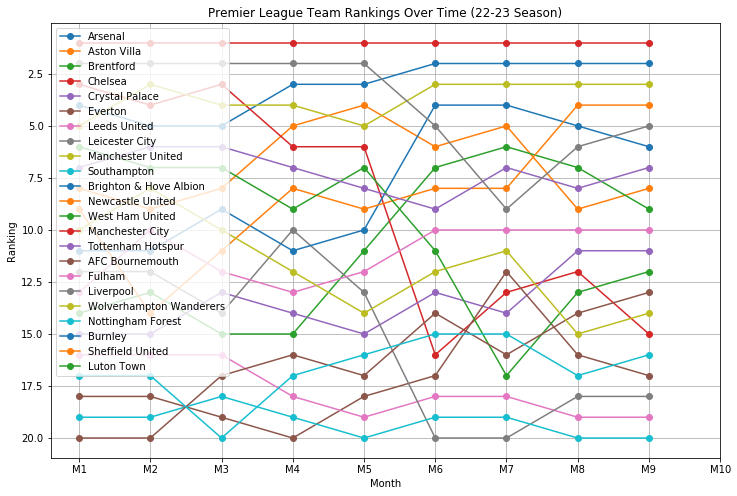

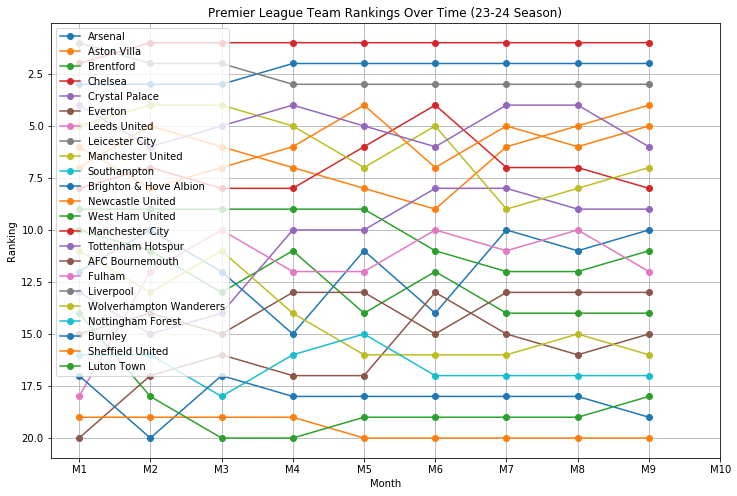

In [8]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import re
import matplotlib.pyplot as plt

# 1. 数据加载 - 加载两个赛季的数据并合并
data_2223 = pd.read_csv('22-23 Premier League Data Final.csv')
data_2324 = pd.read_csv('23-24 Premier League Data Final.csv')

# 给每个赛季的数据添加一个标识列
data_2223['Season'] = '22-23'
data_2324['Season'] = '23-24'

# 合并两个赛季的数据集
data = pd.concat([data_2223, data_2324], ignore_index=True,sort=False)

# 2. 特征准备和预处理
def convert_results_to_numeric(results):
    return results.apply(lambda x: 1 if x == 'W' else (0 if x == 'D' else -1))

data['HomePrevious'] = convert_results_to_numeric(data['HomePrevious'])
data['AwayPrevious'] = convert_results_to_numeric(data['AwayPrevious'])

data['Month'] = data['MatchDate'].apply(lambda date: int(re.search(r'(?<=\d{4}-)(\d{2})(?=-\d{2})', date).group(1)))

def calculate_match_result(row):
    if row['HomeGoals'] > row['AwayGoals']:
        return 1
    elif row['HomeGoals'] < row['AwayGoals']:
        return 2
    else:
        return 0

data['MatchResult'] = data.apply(calculate_match_result, axis=1)

# 模型训练与预测函数
def train_and_predict(data, months, season):
    global teams_points

    train_data = data[(data['Month'].isin(months)) & (data['Season'] == season)]
    test_data = data[(data['Month'] > months[-1]) & (data['Season'] == season)]

    if train_data.empty or test_data.empty:
        print(f"No data available for months: {months} in season: {season}")
        return None, None

    X_train = train_data[['HomeTeamRating', 'AwayTeamRating', 'HomePrevious', 'AwayPrevious']]
    y_train = train_data['MatchResult']
    X_test = test_data[['HomeTeamRating', 'AwayTeamRating', 'HomePrevious', 'AwayPrevious']]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    gnb_model = GaussianNB()
    gnb_model.fit(X_train_scaled, y_train)
    y_pred_gnb = gnb_model.predict(X_test_scaled)

    return y_pred_gnb, test_data

# 积分榜初始化
teams_points = {}
rankings_history = {}

# 3. 计算真实积分榜
def calculate_final_standings(data):
    points = {}
    for index, row in data.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        home_goals = row['HomeGoals']
        away_goals = row['AwayGoals']

        if home_team not in points:
            points[home_team] = 0
        if away_team not in points:
            points[away_team] = 0

        if home_goals > away_goals:
            points[home_team] += 3
        elif home_goals < away_goals:
            points[away_team] += 3
        else:
            points[home_team] += 1
            points[away_team] += 1

    return points

# 真实赛季末积分榜的排名
final_standings = calculate_final_standings(data)
sorted_final_standings = sorted(final_standings.items(), key=lambda x: x[1], reverse=True)
real_ranking = {team: rank for rank, (team, points) in enumerate(sorted_final_standings, start=1)}

# 主程序循环，预测所有比赛并输出最终积分榜
for season in ['22-23', '23-24']:
    rankings_history[season] = {team: [] for team in data['HomeTeam'].unique()}
    months = sorted(data[data['Season'] == season]['Month'].unique())

    for i in range(len(months)):
        current_months = months[:i + 1]
        teams_points.clear()

        real_points = calculate_final_standings(data[(data['Month'].isin(current_months)) & (data['Season'] == season)])

        predictions, test_data = train_and_predict(data, current_months, season)

        if predictions is not None and test_data is not None:
            for team, points in real_points.items():
                teams_points[team] = points

            for i in range(len(predictions)):
                team1, team2 = test_data.iloc[i]['HomeTeam'], test_data.iloc[i]['AwayTeam']
                result = predictions[i]

                if team1 not in teams_points:
                    teams_points[team1] = 0
                if team2 not in teams_points:
                    teams_points[team2] = 0

                if result == 1:
                    teams_points[team1] += 3
                elif result == 2:
                    teams_points[team2] += 3
                elif result == 0:
                    teams_points[team1] += 1
                    teams_points[team2] += 1

            predicted_sorted_teams = sorted(teams_points.items(), key=lambda x: x[1], reverse=True)
            predicted_ranking = {team: rank for rank, (team, points) in enumerate(predicted_sorted_teams, start=1)}

            # 只考虑前5名和后5名的准确率
            top_5_real = set(team for team, rank in real_ranking.items() if rank <= 5)
            bottom_5_real = set(team for team, rank in real_ranking.items() if rank > len(real_ranking) - 5)
            top_bottom_5_real = top_5_real.union(bottom_5_real)

            correct_top_bottom_predictions = sum(1 for team in top_bottom_5_real if predicted_ranking.get(team) in top_bottom_5_real)
            ranking_accuracy_score = (correct_top_bottom_predictions / 10) * 100


            for rank, (team, points) in enumerate(predicted_sorted_teams, start=1):
                rankings_history[season][team].append(rank)


# 可视化排名历史
for season in ['22-23', '23-24']:
    plt.figure(figsize=(12, 8))
    for team, ranks in rankings_history[season].items():
        plt.plot(range(1, len(ranks) + 1), ranks, marker='o', label=team)

    plt.gca().invert_yaxis()
    plt.xticks(range(1, len(months) + 1), [f"M{i}" for i in range(1, len(months) + 1)])
    plt.xlabel('Month')
    plt.ylabel('Ranking')
    plt.title(f'Premier League Team Rankings Over Time ({season} Season)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


# Text Output.py

In [9]:
#Text Output.py
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import re
import matplotlib.pyplot as plt

# 1. 数据加载 - 加载两个赛季的数据并合并
data_2223 = pd.read_csv('22-23 Premier League Data Final.csv')
data_2324 = pd.read_csv('23-24 Premier League Data Final.csv')

# 给每个赛季的数据添加一个标识列
data_2223['Season'] = '22-23'
data_2324['Season'] = '23-24'

# 合并两个赛季的数据集
data = pd.concat([data_2223, data_2324], ignore_index=True, sort=False)

# 2. 特征准备和预处理
def convert_results_to_numeric(results):
    return results.apply(lambda x: 1 if x == 'W' else (0 if x == 'D' else -1))

data['HomePrevious'] = convert_results_to_numeric(data['HomePrevious'])
data['AwayPrevious'] = convert_results_to_numeric(data['AwayPrevious'])

data['Month'] = data['MatchDate'].apply(lambda date: int(re.search(r'(?<=\d{4}-)(\d{2})(?=-\d{2})', date).group(1)))

def calculate_match_result(row):
    if row['HomeGoals'] > row['AwayGoals']:
        return 1
    elif row['HomeGoals'] < row['AwayGoals']:
        return 2
    else:
        return 0

data['MatchResult'] = data.apply(calculate_match_result, axis=1)

# 模型训练与预测函数
def train_and_predict(data, months, season):
    global teams_points

    train_data = data[(data['Month'].isin(months)) & (data['Season'] == season)]
    test_data = data[(data['Month'] > months[-1]) & (data['Season'] == season)]

    if train_data.empty or test_data.empty:
        print(f"No data available for months: {months} in season: {season}")
        return None, None

    X_train = train_data[['HomeTeamRating', 'AwayTeamRating', 'HomePrevious', 'AwayPrevious']]
    y_train = train_data['MatchResult']

    X_test = test_data[['HomeTeamRating', 'AwayTeamRating', 'HomePrevious', 'AwayPrevious']]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    gnb_model = GaussianNB()
    gnb_model.fit(X_train_scaled, y_train)
    y_pred_gnb = gnb_model.predict(X_test_scaled)

    return y_pred_gnb, test_data

# 积分榜初始化
teams_points = {}
rankings_history = {}

# 3. 计算真实积分榜
def calculate_final_standings(data):
    points = {}

    for index, row in data.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        home_goals = row['HomeGoals']
        away_goals = row['AwayGoals']

        if home_team not in points:
            points[home_team] = 0
        if away_team not in points:
            points[away_team] = 0

        if home_goals > away_goals:  # 主队胜
            points[home_team] += 3
        elif home_goals < away_goals:  # 客队胜
            points[away_team] += 3
        else:  # 平局
            points[home_team] += 1
            points[away_team] += 1

    return points

# 主程序循环，输出最终积分榜和准确率
for season in ['22-23', '23-24']:
    rankings_history[season] = {team: [] for team in data['HomeTeam'].unique()}
    months = sorted(data[data['Season'] == season]['Month'].unique())

    for i in range(len(months)):
        current_months = months[:i + 1]
        teams_points.clear()

        # 首先计算真实积分榜
        real_points = calculate_final_standings(data[(data['Month'].isin(current_months)) & (data['Season'] == season)])

        predictions, test_data = train_and_predict(data, current_months, season)

        if predictions is not None and test_data is not None:
            # 更新积分榜，首先添加真实比赛的积分
            for team, points in real_points.items():
                teams_points[team] = points

            # 然后添加预测结果的积分
            for i in range(len(predictions)):
                team1, team2 = test_data.iloc[i]['HomeTeam'], test_data.iloc[i]['AwayTeam']
                result = predictions[i]

                if team1 not in teams_points:
                    teams_points[team1] = 0
                if team2 not in teams_points:
                    teams_points[team2] = 0

                if result == 1:  # 主队胜
                    teams_points[team1] += 3
                elif result == 2:  # 客队胜
                    teams_points[team2] += 3
                elif result == 0:  # 平局
                    teams_points[team1] += 1
                    teams_points[team2] += 1

            # 输出当前的最终积分榜（基于所有可用数据）
            sorted_teams = sorted(teams_points.items(), key=lambda x: x[1], reverse=True)

            print(f"\nBased on the results of the previous {len(current_months)} months - Final Standings:")
            print("Rank\tTeam\tPoints")

            for rank, (team, points) in enumerate(sorted_teams, start=1):
                print(f"{rank}\t{team}\t{points}")

            # 输出准确率（只考虑前5名和后5名）
            real_sorted_standings = sorted(real_points.items(), key=lambda x: x[1], reverse=True)
            real_top_5 = set(team for team, _ in real_sorted_standings[:5])
            real_bottom_5 = set(team for team, _ in real_sorted_standings[-5:])

            predicted_sorted_standings = sorted(teams_points.items(), key=lambda x: x[1], reverse=True)
            predicted_top_5 = set(team for team, _ in predicted_sorted_standings[:5])
            predicted_bottom_5 = set(team for team, _ in predicted_sorted_standings[-5:])

            correct_top_bottom_predictions_count = len(real_top_5.intersection(predicted_top_5)) + len(real_bottom_5.intersection(predicted_bottom_5))
            total_comparisons_count = len(real_top_5) + len(real_bottom_5)

            accuracy_score = (correct_top_bottom_predictions_count / total_comparisons_count) * 100 if total_comparisons_count > 0 else None

            print(f"Top and Bottom Ranking Prediction Accuracy for Season {season}: {accuracy_score:.2f}%" if accuracy_score is not None else "No valid results available for accuracy calculation.")

# 输出两个赛季的真实积分榜
for season in ['22-23', '23-24']:
    final_standings_season = calculate_final_standings(data[data['Season'] == season])
    sorted_final_standings_season = sorted(final_standings_season.items(), key=lambda x: x[1], reverse=True)

    print(f'\nFinal LeaderBoard for Season {season}:')
    print('Rank\tTeam\tPoints')

    for rank, (team, score) in enumerate(sorted_final_standings_season, start=1):
        print(f'{rank}\t{team}\t{score}')


Based on the results of the previous 1 months - Final Standings:
Rank	Team	Points
1	Manchester City	84
2	Liverpool	82
3	Chelsea	80
4	Arsenal	76
5	Manchester United	76
6	West Ham United	70
7	Tottenham Hotspur	66
8	Aston Villa	61
9	Newcastle United	59
10	Wolverhampton Wanderers	58
11	Brighton & Hove Albion	55
12	Leicester City	52
13	Fulham	51
14	Brentford	49
15	Crystal Palace	47
16	Leeds United	41
17	Nottingham Forest	38
18	Everton	36
19	Southampton	27
20	AFC Bournemouth	22
Top and Bottom Ranking Prediction Accuracy for Season 22-23: 40.00%

Based on the results of the previous 2 months - Final Standings:
Rank	Team	Points
1	Manchester City	103
2	Liverpool	89
3	Manchester United	80
4	Chelsea	76
5	Arsenal	71
6	Tottenham Hotspur	67
7	West Ham United	63
8	Wolverhampton Wanderers	56
9	Aston Villa	55
10	Fulham	55
11	Brighton & Hove Albion	53
12	Leicester City	49
13	Brentford	48
14	Newcastle United	46
15	Crystal Palace	44
16	Leeds United	39
17	Nottingham Forest	36
18	Everton	31
19	Southampton	

# 24-25 Premier League Prediction.py

In [10]:
#24-25 Premier League Prediction.py
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import re
import numpy as np

# 数据加载 - 加载三个赛季的数据并合并（请确保文件路径正确）
data_2223 = pd.read_csv('22-23 Premier League Data Final.csv')
data_2324 = pd.read_csv('23-24 Premier League Data Final.csv')
data_2425 = pd.read_csv('24-25 Premier League Data Final.csv')

# 给每个赛季的数据添加一个标识列
data_2223['Season'] = '22-23'
data_2324['Season'] = '23-24'
data_2425['Season'] = '24-25'

# 合并三个赛季的数据集
data = pd.concat([data_2223, data_2324, data_2425], ignore_index=True, sort=False)

# 特征准备和预处理
def convert_results_to_numeric(results):
    return results.apply(lambda x: 1 if x == 'W' else (0 if x == 'D' else -1))

def calculate_match_result(row):
    if row['HomeGoals'] > row['AwayGoals']:
        return 1
    elif row['HomeGoals'] < row['AwayGoals']:
        return 2
    else:
        return 0

# 更新特征准备和预处理步骤
data['HomePrevious'] = convert_results_to_numeric(data['HomePrevious'])
data['AwayPrevious'] = convert_results_to_numeric(data['AwayPrevious'])

# 提取月份并确保在此之前所有数据都已准备好
data['Month'] = data['MatchDate'].apply(lambda date: int(re.search(r'(?<=\d{4}-)(\d{2})(?=-\d{2})', date).group(1)))
data['MatchResult'] = data.apply(calculate_match_result, axis=1)

# 检查并去除包含 NaN 的行
data.dropna(subset=['HomeTeamRating', 'AwayTeamRating', 'HomePrevious', 'AwayPrevious', 'MatchResult'], inplace=True)

# 积分榜初始化
teams_points = {}
rankings_history = {}

# 初始化用于追踪胜负平场次的字典
teams_record = {}

# 计算真实积分榜
def calculate_final_standings(data):
    points = {}

    # 确保 HomeGoals 和 AwayGoals 列不包含 NaN
    valid_data = data.dropna(subset=['HomeGoals', 'AwayGoals'])

    for index, row in valid_data.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        home_goals = row['HomeGoals']
        away_goals = row['AwayGoals']

        if home_team not in points:
            points[home_team] = 0
        if away_team not in points:
            points[away_team] = 0

        if home_goals > away_goals:  # 主队胜
            points[home_team] += 3
        elif home_goals < away_goals:  # 客队胜
            points[away_team] += 3
        else:  # 平局
            points[home_team] += 1
            points[away_team] += 1

    return points

# 函数来更新球队的胜负平记录
def update_team_records(team, result):
    if team not in teams_record:
        teams_record[team] = {'Wins': 0, 'Losses': 0, 'Draws': 0}

    if result == 'Win':
        teams_record[team]['Wins'] += 1
    elif result == 'Loss':
        teams_record[team]['Losses'] += 1
    elif result == 'Draw':
        teams_record[team]['Draws'] += 1

# 模型训练与预测函数
def train_and_predict(data, months, season):
    global teams_points, gnb_model

    train_data = data[(data['Month'].isin(months)) & (data['Season'] == season)]
    test_data = data[(data['Month'] > months[-1]) & (data['Season'] == season)]

    if train_data.empty or test_data.empty:
        print(f"No data available for months: {months} in season: {season}")
        return None, None

    X_train = train_data[['HomeTeamRating', 'AwayTeamRating', 'HomePrevious', 'AwayPrevious']].copy()
    y_train = train_data['MatchResult'].copy()

    X_test = test_data[['HomeTeamRating', 'AwayTeamRating', 'HomePrevious', 'AwayPrevious']].copy()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    gnb_model = GaussianNB()
    gnb_model.fit(X_train_scaled, y_train)
    y_pred_proba_gnb = gnb_model.predict_proba(X_test_scaled)

    return y_pred_proba_gnb, test_data

# 对剩余比赛进行预测并计算积分榜时也更新胜负平场次
X_new_season_completed_matches = data[(data['Season'] == '24-25') & (~data['HomeGoals'].isnull() & ~data['AwayGoals'].isnull())]
X_new_season_remaining_matches = data[(data['Season'] == '24-25') & (data['HomeGoals'].isnull() | data['AwayGoals'].isnull())].copy()

# 标准化新赛季的特征数据（包括已完成的比赛）
X_all_seasons_features = data[['HomeTeamRating', 'AwayTeamRating', 'HomePrevious', 'AwayPrevious']]
scaler = StandardScaler()
scaler.fit(X_all_seasons_features)

# 在对已完成比赛进行积分计算时更新胜负平场次
for index, row in X_new_season_completed_matches.iterrows():
    team1, team2 = row['HomeTeam'], row['AwayTeam']

    if team1 not in teams_points:
        teams_points[team1] = 0
    if team2 not in teams_points:
        teams_points[team2] = 0

    home_goals, away_goals = row['HomeGoals'], row['AwayGoals']

    if home_goals > away_goals:
        teams_points[team1] += 3
        update_team_records(team1, 'Win')
        update_team_records(team2, 'Loss')
    elif home_goals < away_goals:
        teams_points[team2] += 3
        update_team_records(team2, 'Win')
        update_team_records(team1, 'Loss')
    else:
        teams_points[team1] += 1
        teams_points[team2] += 1
        update_team_records(team1, 'Draw')
        update_team_records(team2, 'Draw')

# 对未完成的比赛使用模型进行预测，并更新积分和记录
if not X_new_season_remaining_matches.empty:
    X_remaining_features = X_new_season_remaining_matches[['HomeTeamRating', 'AwayTeamRating', 'HomePrevious', 'AwayPrevious']]

    X_remaining_scaled = scaler.transform(X_remaining_features)

    # 使用全体数据重新训练模型
    gnb_model_fit_for_remaining_matches = GaussianNB()
    gnb_model_fit_for_remaining_matches.fit(scaler.transform(X_all_seasons_features), data['MatchResult'])

    y_pred_proba_remaining_matches = gnb_model_fit_for_remaining_matches.predict_proba(X_remaining_scaled)

    # 设置平局阈值
    draw_threshold = 0.35  # 这个值可以根据历史数据或交叉验证结果进行调整

    # 应用阈值调整逻辑以调整平局预测
    y_pred_adjusted = []
    for probas in y_pred_proba_remaining_matches:
        if probas[1] > draw_threshold:
            y_pred_adjusted.append(0)  # 假设类别编码中 0 代表平局
        else:
            y_pred_adjusted.append(np.argmax([probas[0], probas[2]]) * 2 - 1)  # 胜利或失败

    # 将调整后的预测结果添加到DataFrame中
    X_new_season_remaining_matches['PredictedMatchResult'] = y_pred_adjusted

    for index, row in X_new_season_remaining_matches.iterrows():
        team1, team2 = row['HomeTeam'], row['AwayTeam']

        if team1 not in teams_points:
            teams_points[team1] = 0
        if team2 not in teams_points:
            teams_points[team2] = 0

        result = row['PredictedMatchResult']

        if result == 1:
            teams_points[team1] += 3
            update_team_records(team1, 'Win')
            update_team_records(team2, 'Loss')
        elif result == -1:
            teams_points[team2] += 3
            update_team_records(team2, 'Win')
            update_team_records(team1, 'Loss')
        else: # 平局的情况
            teams_points[team1] += 1
            teams_points[team2] += 1
            update_team_records(team1, 'Draw')
            update_team_records(team2, 'Draw')

# 创建24-25赛季的最终预测积分榜及每支队伍的胜负平场次数的DataFrame
leaderboard_data = []

predicted_sorted_teams_final_leaderboard = sorted(teams_points.items(), key=lambda x: x[1], reverse=True)
for rank, (team, points) in enumerate(predicted_sorted_teams_final_leaderboard, start=1):
    wins = teams_record[team]['Wins']
    draws = teams_record[team]['Draws']
    losses = teams_record[team]['Losses']
    leaderboard_data.append({'Rank': rank, 'Team': team, 'Points': points,
                             'Wins': wins, 'Draws': draws, 'Losses': losses})

leaderboard_df = pd.DataFrame(leaderboard_data)

# 设置正确的数据类型
leaderboard_df['Rank'] = leaderboard_df['Rank'].astype(int)
leaderboard_df['Points'] = leaderboard_df['Points'].astype(int)
leaderboard_df['Wins'] = leaderboard_df['Wins'].astype(int)
leaderboard_df['Draws'] = leaderboard_df['Draws'].astype(int)
leaderboard_df['Losses'] = leaderboard_df['Losses'].astype(int)

print("\nPredicted Final LeaderBoard and Records for Season 24-25:")
print(leaderboard_df.to_string(index=False))


Predicted Final LeaderBoard and Records for Season 24-25:
 Rank                     Team  Points  Wins  Draws  Losses
    1          Manchester City      72    21      9       8
    2                Liverpool      71    21      8       9
    3                  Arsenal      71    21      8       9
    4              Aston Villa      62    20      2      16
    5                  Chelsea      62    20      2      16
    6        Tottenham Hotspur      57    18      3      16
    7   Brighton & Hove Albion      56    17      5      16
    8          West Ham United      56    18      2      18
    9                Brentford      56    18      2      18
   10         Newcastle United      54    17      3      17
   11        Manchester United      53    17      2      19
   12                   Fulham      52    16      4      18
   13        Nottingham Forest      51    15      6      17
   14           Leicester City      50    15      5      18
   15          AFC Bournemouth      49   